In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import pearsonr, spearmanr

In [2]:
file = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22_tiered_rankedidea/cellular_fraction/perctcorr/maxscore_relative/flexible_cross_correlation/Previous_method_TieredV1_NOPC_toy.txt'
#Cytof
orderedcells=['NaiveCD4','cm4', 'em4','Tregs','NK','Mono','NaiveCD8','cm8','em8','ed8', 'nB','mB']

#Flow
#orderedcells=['NaiveCD4','cm4', 'em4','Tregs','NK','Mono', 'nB','mB']
data = pd.read_csv(file, sep='\t', index_col=0)
df = pd.DataFrame(data)

df

,NaiveCD4,NaiveCD8,PC,Mono,M0,M1,M2,iDC,mDC,PMN,...,mB_real,nB_real,NaiveCD4_real,NaiveCD8_real,Tregs_real,cm4_real,em4_real,cm8_real,em8_real,ed8_real
Mixture,,,,,,,,,,,,,,,,,,,,,
healthy_NU-03-bulk-PBMC,7.021204,6.501725,0,3.073992,2.331231,2.358422,1.734444,2.165441,2.637784,1.964774,...,2.292636,5.254939,13.95,24.16,0.28,10.1,4.8,1.9,8.9,5.4
healthy_NU-14-bulk-PBMC,8.360065,8.053142,0,2.885900,2.255017,2.185740,1.823463,2.514326,2.846468,2.042172,...,4.287835,4.728697,11.51,23.85,0.12,8.5,3.2,1.2,10.3,2.8
healthy_NU-24-bulk-PBMC,10.996334,8.746845,0,3.361484,2.248079,2.101188,1.628838,2.265448,2.288437,2.088860,...,1.988879,4.763505,24.75,14.26,0.44,9.3,5.1,1.0,7.2,4.5
healthy_NU-31-bulk-PBMC,8.707729,8.067880,0,3.131887,2.204353,2.215596,1.738241,2.131311,2.406940,1.831280,...,2.939821,5.582461,15.48,23.93,0.11,8.2,3.6,0.8,7.3,4.9
healthy_NU-49-bulk-PBMC,9.409563,8.366395,0,2.958390,2.207454,2.111118,1.763174,2.183159,2.436111,2.220247,...,3.057876,6.958287,12.74,23.95,0.19,8.4,6.6,1.2,8.2,4.5
healthy_NU-50-bulk-PBMC,8.163432,7.150599,0,5.097193,3.616595,2.860043,2.084447,2.667123,2.791094,2.629059,...,2.142269,8.985444,14.53,10.83,0.14,7.7,1.7,0.9,3.5,1.8
healthy_NU-51-bulk-PBMC,8.702079,8.085953,0,4.812906,2.898366,2.576253,1.894008,3.063973,2.757893,2.207390,...,3.552740,3.834578,10.61,9.11,0.21,5.6,3.5,0.4,3.0,2.1


In [3]:
gt = []
est = []
for col in df.columns:
    if '_real' in col:
        gt.append(col[:-5])
    else:
        est.append(col)
        
cells = list(set(gt) & set(est))

In [4]:
pearson_dic = {}
spearman_dic = {}
for cell in cells:
    cell_arr = np.array(df[cell])
    pearson_dic[cell] = []
    spearman_dic[cell] = []
    for cell_real in cells:
        cell_real_arr = np.array(df[cell_real + '_real'])
        pearson_corr = pearsonr(cell_arr, cell_real_arr)[0]
        spearman_corr = spearmanr(cell_arr, cell_real_arr)[0]
        pearson_dic[cell].append(pearson_corr)
        spearman_dic[cell].append(spearman_corr)
        
df_pearson = pd.DataFrame.from_dict(pearson_dic, orient='index', columns=cells)
df_spearman = pd.DataFrame.from_dict(spearman_dic, orient='index', columns=cells)



In [5]:
standardnamedict={"NaiveCD4": "Naive CD4 T", "NaiveCD8": "Naive CD8 T","CD4": "Naive CD4", "CD8": "Naive CD8","mB":"Memory B",'Mn':'Mono','CD14':'Mono','CD19':'B Cell','nB':'Naive B','PC':'PC','cm8':'CD8 TCM','em8':'CD8 TEM','m8':'CD8 memory','ed8':'CD8 TEMRA','cm4':'CD4 TCM','em4':'CD4 TEM','m4':'CD4 memory','mNeu':'PMN','Eo':'Eosinophil','Tr':'Tregs','Mg':'Megakaryocyte','Er':'Erythrocyte'}

In [6]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [7]:
common_cells=intersection(orderedcells, df_pearson.columns)
if len(common_cells)>0:
    df_pearson=df_pearson.reindex(orderedcells).dropna(how='all')
    df_pearson=df_pearson.reindex(orderedcells,axis=1).dropna(how='all', axis=1)

    df_spearman=df_spearman.reindex(orderedcells).dropna(how='all')
    df_spearman=df_spearman.reindex(orderedcells,axis=1).dropna(how='all', axis=1)





df_pearson.rename(columns=standardnamedict,inplace=True)
df_pearson.rename(index=standardnamedict,inplace=True)

df_spearman.rename(columns=standardnamedict,inplace=True)
df_spearman.rename(index=standardnamedict,inplace=True)

df_pearson.head()

,Naive CD4 T,CD4 TCM,CD4 TEM,Tregs,Mono,Naive CD8 T,CD8 TCM,CD8 TEM,CD8 TEMRA,Memory B
Naive CD4 T,0.697408,-0.037427,0.388823,0.542185,-0.234697,-0.259038,-0.417346,-0.054670,0.082403,-0.167426
CD4 TCM,0.868449,0.494415,0.636715,0.843843,-0.329405,-0.029758,0.174836,0.161517,0.522986,-0.624872
CD4 TEM,0.256538,0.921555,0.586901,0.374446,-0.556734,0.712544,0.929936,0.742617,0.847449,-0.342250
Tregs,0.886943,0.704643,0.471934,0.813247,-0.219802,0.037305,0.407018,0.255283,0.525653,-0.741176
Mono,-0.154641,-0.700813,-0.642679,-0.112419,0.846641,-0.903248,-0.596645,-0.950177,-0.780343,-0.197493


In [8]:
df_pearson.to_csv(file + '_pearson.txt', sep='\t')
df_spearman.to_csv(file + '_spearman.txt', sep='\t')

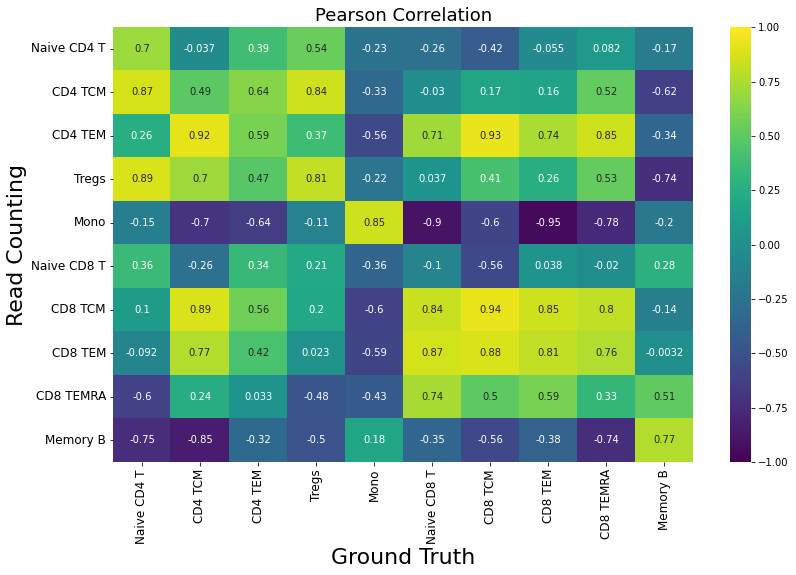

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))

sns.heatmap(df_pearson, cmap='viridis', annot=True,annot_kws={"size": 10}, ax=ax, vmin=-1, vmax=1)
ax.set_xlabel('Ground Truth', fontsize=22)
ax.set_ylabel('Read Counting', fontsize=22)
ax.set_title('Pearson Correlation', fontsize=18)

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 12,rotation=90)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 12,rotation=0)


plt.savefig(file + '_pearson.pdf', bbox_inches='tight')

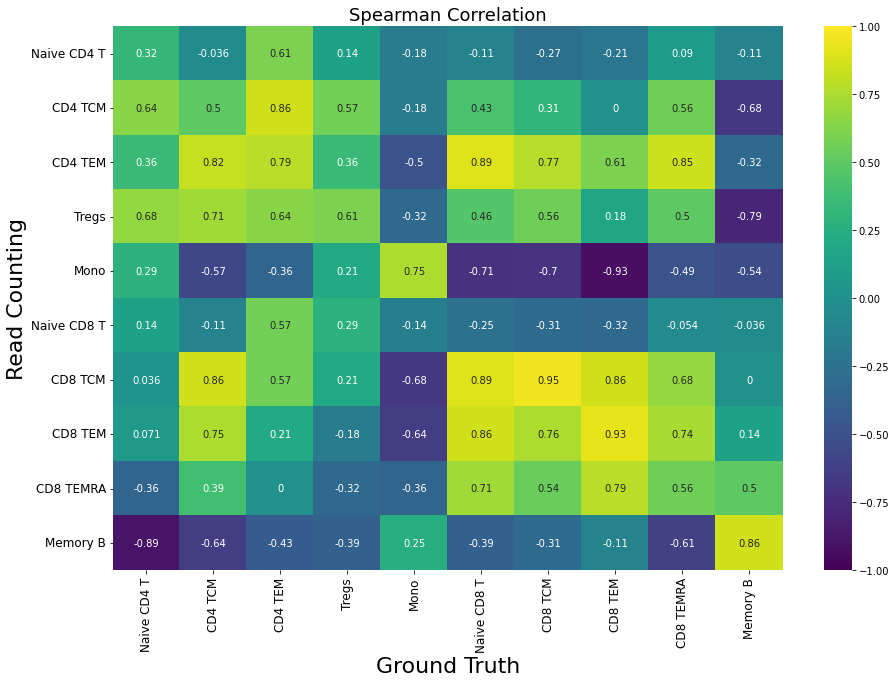

In [10]:
fig2, ax2 = plt.subplots(1, 1, figsize=(15, 10))

sns.heatmap(df_spearman, cmap='viridis', annot=True,annot_kws={"size": 10}, ax=ax2, vmin=-1, vmax=1)
ax2.set_xlabel('Ground Truth', fontsize=22)
ax2.set_ylabel('Read Counting', fontsize=22)
ax2.set_title('Spearman Correlation', fontsize=18)

ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 12,rotation=90)
ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 12,rotation=0)

plt.savefig(file + '_spearman.pdf', bbox_inches='tight')